# Нейронные сети: лабораторная работа

##### Работу выполняли: Гамов П., Хренов Г., Шичко А.

Подготовка данных

In [1]:
import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.insert(0, './data')
import data_reciever

train, test = data_reciever.get_data('./data/')
x_train, y_train, x_test, y_test = [], [], [], []

for x_tr, y_tr in train:
    x_train.append(x_tr)
    y_train.append(y_tr)

for x_tst, y_tst in test:
    x_test.append(x_tst)
    y_test.append(y_tst)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

pic_size = 32
col_deep = 3
out_num = 3

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


 recieved 707 of learn_data and 193 in 0.43643879890441895 sec


Данные для обучения имеют размерность:

In [25]:
x_train.shape

(714, 32, 32, 3)

## Обучение полносвязной нейронной сети

с одним слоем

In [2]:
model = keras.models.Sequential()
model.add(Dense(512, input_shape=(pic_size,pic_size,col_deep), activation='relu'))
model.add(Flatten())
model.add(Dense(out_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
23/23 [==============================] - 15s 167ms/step - loss: 3731.9729 - accuracy: 0.3297 - val_loss: 786.0949 - val_accuracy: 0.4715
Epoch 2/5
23/23 [==============================] - 3s 142ms/step - loss: 691.4948 - accuracy: 0.4246 - val_loss: 13.8871 - val_accuracy: 0.7565
Epoch 3/5
23/23 [==============================] - 3s 137ms/step - loss: 16.7471 - accuracy: 0.7534 - val_loss: 21.0515 - val_accuracy: 0.6995
Epoch 4/5
23/23 [==============================] - 3s 138ms/step - loss: 9.9099 - accuracy: 0.8065 - val_loss: 27.6314 - val_accuracy: 0.7306
Epoch 5/5
23/23 [==============================] - 3s 145ms/step - loss: 13.9665 - accuracy: 0.7910 - val_loss: 6.0544 - val_accuracy: 0.8653


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 32, 512)       2048      
_________________________________________________________________
flatten (Flatten)            (None, 524288)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1572867   
Total params: 1,574,915
Trainable params: 1,574,915
Non-trainable params: 0
_________________________________________________________________


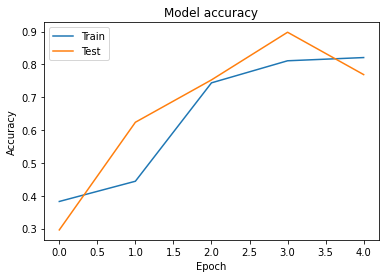

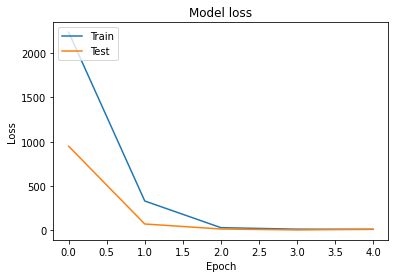

In [4]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

с двумя слоями

In [ ]:
model = keras.models.Sequential()
model.add(Dense(64, input_shape=(pic_size,pic_size,col_deep), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Flatten())
model.add(Dense(out_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
23/23 [==============================] - 3s 114ms/step - loss: 1544.9668 - accuracy: 0.3488 - val_loss: 255.7784 - val_accuracy: 0.3109
Epoch 2/10
23/23 [==============================] - 2s 107ms/step - loss: 146.0595 - accuracy: 0.4378 - val_loss: 45.5971 - val_accuracy: 0.6321
Epoch 3/10
23/23 [==============================] - 2s 98ms/step - loss: 23.7946 - accuracy: 0.5709 - val_loss: 1.9530 - val_accuracy: 0.7202
Epoch 4/10
15/23 [==================>...........] - ETA: 0s - loss: 1.1977 - accuracy: 0.7969

In [ ]:
model.summary()

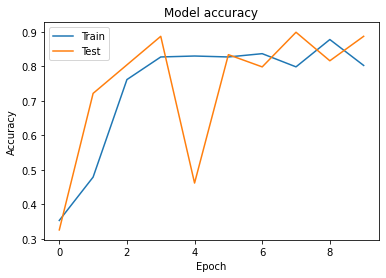

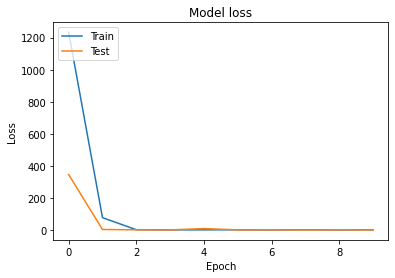

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Обучение свёрточной нейронной сети

In [54]:
model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(pic_size,pic_size,col_deep)))
model.add(MaxPooling2D())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(out_num, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('**********************************************')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

**********************************************
Epoch 1/10
23/23 [==============================] - 1s 26ms/step - loss: 55.9050 - accuracy: 0.5077 - val_loss: 1.4538 - val_accuracy: 0.6931
Epoch 2/10
23/23 [==============================] - 0s 19ms/step - loss: 0.7577 - accuracy: 0.7693 - val_loss: 0.4784 - val_accuracy: 0.8254
Epoch 3/10
23/23 [==============================] - 0s 20ms/step - loss: 0.3047 - accuracy: 0.8819 - val_loss: 0.3178 - val_accuracy: 0.9259
Epoch 4/10
23/23 [==============================] - 0s 19ms/step - loss: 0.1498 - accuracy: 0.9536 - val_loss: 0.2776 - val_accuracy: 0.9418
Epoch 5/10
23/23 [==============================] - 0s 20ms/step - loss: 0.1071 - accuracy: 0.9578 - val_loss: 0.2359 - val_accuracy: 0.9630
Epoch 6/10
23/23 [==============================] - 1s 22ms/step - loss: 0.0892 - accuracy: 0.9733 - val_loss: 0.1897 - val_accuracy: 0.9630
Epoch 7/10
23/23 [==============================] - 0s 21ms/step - loss: 0.0429 - accuracy: 0.9902 - val_l

Процесс обучения

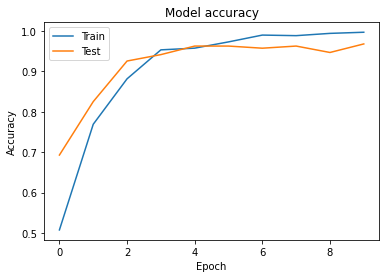

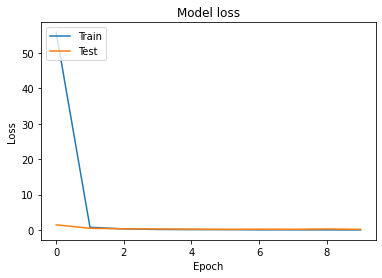

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Оказалось, что эффективнее показала себя сверточная сеть.